# Importing Necessary Libraries

In [87]:
import os
import numpy as np
import pandas as pd

#from raceplotly.plots import barplot
import missingno
import seaborn as sns
import plotly.express as px 
import plotly.graph_objects as go
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist
from scipy import stats
#import spotipy as sp

import warnings
warnings.filterwarnings("ignore")

# Importing Dataset & Cleaning

In [88]:
df = pd.read_csv('data/data.csv')
df_year = pd.read_csv('data/data_by_year.csv')
df_genre = pd.read_csv('data/data_by_genres.csv')

In [89]:
#df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

## Describing the dataset

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   valence           9999 non-null   float64
 1   year              9999 non-null   int64  
 2   acousticness      9999 non-null   float64
 3   artists           9999 non-null   object 
 4   danceability      9999 non-null   float64
 5   duration_ms       9999 non-null   int64  
 6   energy            9999 non-null   float64
 7   explicit          9999 non-null   int64  
 8   id                9999 non-null   object 
 9   instrumentalness  9999 non-null   float64
 10  key               9999 non-null   int64  
 11  liveness          9999 non-null   float64
 12  loudness          9999 non-null   float64
 13  mode              9999 non-null   int64  
 14  name              9999 non-null   object 
 15  popularity        9999 non-null   int64  
 16  release_date      9999 non-null   object 


In [91]:
df['year'] = pd.Categorical(df['year'])
df['key'] = pd.Categorical(df['key'])
df['mode'] = pd.Categorical(df['mode'])

In [92]:
round(df.describe(include = 'all'),2)

valence    year  acousticness               artists  danceability  \
count   9999.00  9999.0       9999.00                  9999       9999.00   
unique      NaN    51.0           NaN                  2360           NaN   
top         NaN  1926.0           NaN  ['Francisco Canaro']           NaN   
freq        NaN   200.0           NaN                   220           NaN   
mean       0.54     NaN          0.78                   NaN          0.53   
std        0.26     NaN          0.27                   NaN          0.17   
min        0.00     NaN          0.00                   NaN          0.00   
25%        0.33     NaN          0.70                   NaN          0.41   
50%        0.57     NaN          0.90                   NaN          0.54   
75%        0.76     NaN          0.98                   NaN          0.65   
max        0.99     NaN          1.00                   NaN          0.93   

        duration_ms   energy  explicit                      id  \
count       9999.00  9999.00   9999.00                    9999   
unique          NaN      NaN       NaN                    9999   
top             NaN      NaN       NaN  3mDOHVY9MWZOTODSNF5GBj   
freq            NaN      NaN       NaN                       1   
mean      203906.31     0.31      0.02                     NaN   
std       121584.75     0.20      0.14                     NaN   
min        10371.00     0.00      0.00                     NaN   
25%       156467.00     0.16      0.00                     NaN   
50%       179307.00     0.28      0.00                     NaN   
75%       205774.00     0.43      0.00                     NaN   
max      3499774.00     1.00      1.00                     NaN   

        instrumentalness     key  liveness  loudness    mode             name  \
count            9999.00  9999.0   9999.00   9999.00  9999.0             9999   
unique               NaN    12.0       NaN       NaN     2.0             8663   
top                  NaN     0.0       NaN       NaN     1.0  White Christmas   
freq                 NaN  1298.0       NaN       NaN  7325.0               16   
mean                0.23     NaN      0.21    -13.91     NaN              NaN   
std                 0.36     NaN      0.16      5.01     NaN              NaN   
min                 0.00     NaN      0.02    -40.31     NaN              NaN   
25%                 0.00     NaN      0.10    -16.62     NaN              NaN   
50%                 0.00     NaN      0.14    -13.19     NaN              NaN   
75%                 0.49     NaN      0.26    -10.46     NaN              NaN   
max                 0.99     NaN      0.99     -0.67     NaN              NaN   

        popularity release_date  speechiness    tempo  
count      9999.00         9999      9999.00  9999.00  
unique         NaN          939          NaN      NaN  
top            NaN         1933          NaN      NaN  
freq           NaN          199          NaN      NaN  
mean         23.52          NaN         0.10   113.32  
std          21.51          NaN         0.18    31.34  
min           0.00          NaN         0.00     0.00  
25%           4.00          NaN         0.04    88.87  
50%          16.00          NaN         0.05   110.68  
75%          43.00          NaN         0.07   130.53  
max          85.00          NaN         0.97   221.74

In [93]:
df_genre.info() #checking datatype of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              2973 non-null   int64  
 1   genres            2973 non-null   object 
 2   acousticness      2973 non-null   float64
 3   danceability      2973 non-null   float64
 4   duration_ms       2973 non-null   float64
 5   energy            2973 non-null   float64
 6   instrumentalness  2973 non-null   float64
 7   liveness          2973 non-null   float64
 8   loudness          2973 non-null   float64
 9   speechiness       2973 non-null   float64
 10  tempo             2973 non-null   float64
 11  valence           2973 non-null   float64
 12  popularity        2973 non-null   float64
 13  key               2973 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 325.3+ KB


In [94]:
#converting numeric to categorical
df_genre['genres'] = pd.Categorical(df_genre['genres'])
df_genre['key'] = pd.Categorical(df_genre['key'])
df_genre['mode'] = pd.Categorical(df_genre['mode'])

In [95]:
round(df_genre.describe(include = 'all'),2)

mode  genres  acousticness  danceability  duration_ms   energy  \
count   2973.0    2973       2973.00       2973.00      2973.00  2973.00   
unique     2.0    2973           NaN           NaN          NaN      NaN   
top        1.0  zydeco           NaN           NaN          NaN      NaN   
freq    2477.0       1           NaN           NaN          NaN      NaN   
mean       NaN     NaN          0.40          0.54    251720.85     0.56   
std        NaN     NaN          0.32          0.15     94656.86     0.23   
min        NaN     NaN          0.00          0.06     30946.00     0.00   
25%        NaN     NaN          0.12          0.44    206378.85     0.40   
50%        NaN     NaN          0.32          0.55    237545.34     0.60   
75%        NaN     NaN          0.67          0.65    277272.00     0.73   
max        NaN     NaN          1.00          0.93   2382586.67     0.99   

        instrumentalness  liveness  loudness  speechiness    tempo  valence  \
count            2973.00   2973.00   2973.00      2973.00  2973.00  2973.00   
unique               NaN       NaN       NaN          NaN      NaN      NaN   
top                  NaN       NaN       NaN          NaN      NaN      NaN   
freq                 NaN       NaN       NaN          NaN      NaN      NaN   
mean                0.21      0.19    -10.51         0.08   119.02     0.49   
std                 0.27      0.09      5.37         0.08    17.47     0.20   
min                 0.00      0.02    -41.82         0.02    47.14     0.00   
25%                 0.00      0.14    -12.43         0.04   109.20     0.35   
50%                 0.08      0.18     -9.22         0.06   119.19     0.50   
75%                 0.34      0.22     -6.92         0.09   127.51     0.64   
max                 0.99      0.96      0.06         0.95   204.21     0.98   

        popularity     key  
count      2973.00  2973.0  
unique         NaN    12.0  
top            NaN     7.0  
freq           NaN   694.0  
mean         39.92     NaN  
std          16.75     NaN  
min           0.00     NaN  
25%          32.49     NaN  
50%          43.06     NaN  
75%          51.14     NaN  
max          80.67     NaN

In [96]:
df_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              100 non-null    int64  
 1   year              100 non-null    int64  
 2   acousticness      100 non-null    float64
 3   danceability      100 non-null    float64
 4   duration_ms       100 non-null    float64
 5   energy            100 non-null    float64
 6   instrumentalness  100 non-null    float64
 7   liveness          100 non-null    float64
 8   loudness          100 non-null    float64
 9   speechiness       100 non-null    float64
 10  tempo             100 non-null    float64
 11  valence           100 non-null    float64
 12  popularity        100 non-null    float64
 13  key               100 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 11.1 KB


In [97]:
#converting numeric to categorical
df_year['year'] = pd.Categorical(df_year['year'])
df_year['key'] = pd.Categorical(df_year['key'])
df_year['mode'] = pd.Categorical(df_year['mode'])

In [98]:
round(df_year.describe(include = 'all'),2)

mode    year  acousticness  danceability  duration_ms  energy  \
count   100.0   100.0        100.00        100.00       100.00  100.00   
unique    1.0   100.0           NaN           NaN          NaN     NaN   
top       1.0  1921.0           NaN           NaN          NaN     NaN   
freq    100.0     1.0           NaN           NaN          NaN     NaN   
mean      NaN     NaN          0.56          0.54    227296.75    0.45   
std       NaN     NaN          0.28          0.05     25630.05    0.16   
min       NaN     NaN          0.22          0.41    156881.66    0.21   
25%       NaN     NaN          0.29          0.50    210889.19    0.28   
50%       NaN     NaN          0.46          0.54    235520.85    0.50   
75%       NaN     NaN          0.86          0.57    247702.74    0.60   
max       NaN     NaN          0.96          0.69    267677.82    0.68   

        instrumentalness  liveness  loudness  speechiness   tempo  valence  \
count             100.00    100.00    100.00       100.00  100.00   100.00   
unique               NaN       NaN       NaN          NaN     NaN      NaN   
top                  NaN       NaN       NaN          NaN     NaN      NaN   
freq                 NaN       NaN       NaN          NaN     NaN      NaN   
mean                0.19      0.21    -11.97         0.11  116.02     0.53   
std                 0.12      0.02      3.11         0.08    5.67     0.06   
min                 0.02      0.17    -19.28         0.05  100.88     0.38   
25%                 0.10      0.20    -14.19         0.06  111.72     0.50   
50%                 0.13      0.21    -11.77         0.09  117.46     0.54   
75%                 0.28      0.22     -9.95         0.10  120.61     0.57   
max                 0.58      0.26     -6.60         0.49  124.28     0.66   

        popularity    key  
count       100.00  100.0  
unique         NaN    7.0  
top            NaN    0.0  
freq           NaN   34.0  
mean         27.38    NaN  
std          20.70    NaN  
min           0.14    NaN  
25%           3.30    NaN  
50%          33.62    NaN  
75%          44.94    NaN  
max          65.26    NaN

## Searching for Missing Values

Text(0.5, 1.0, 'Missing records in df')

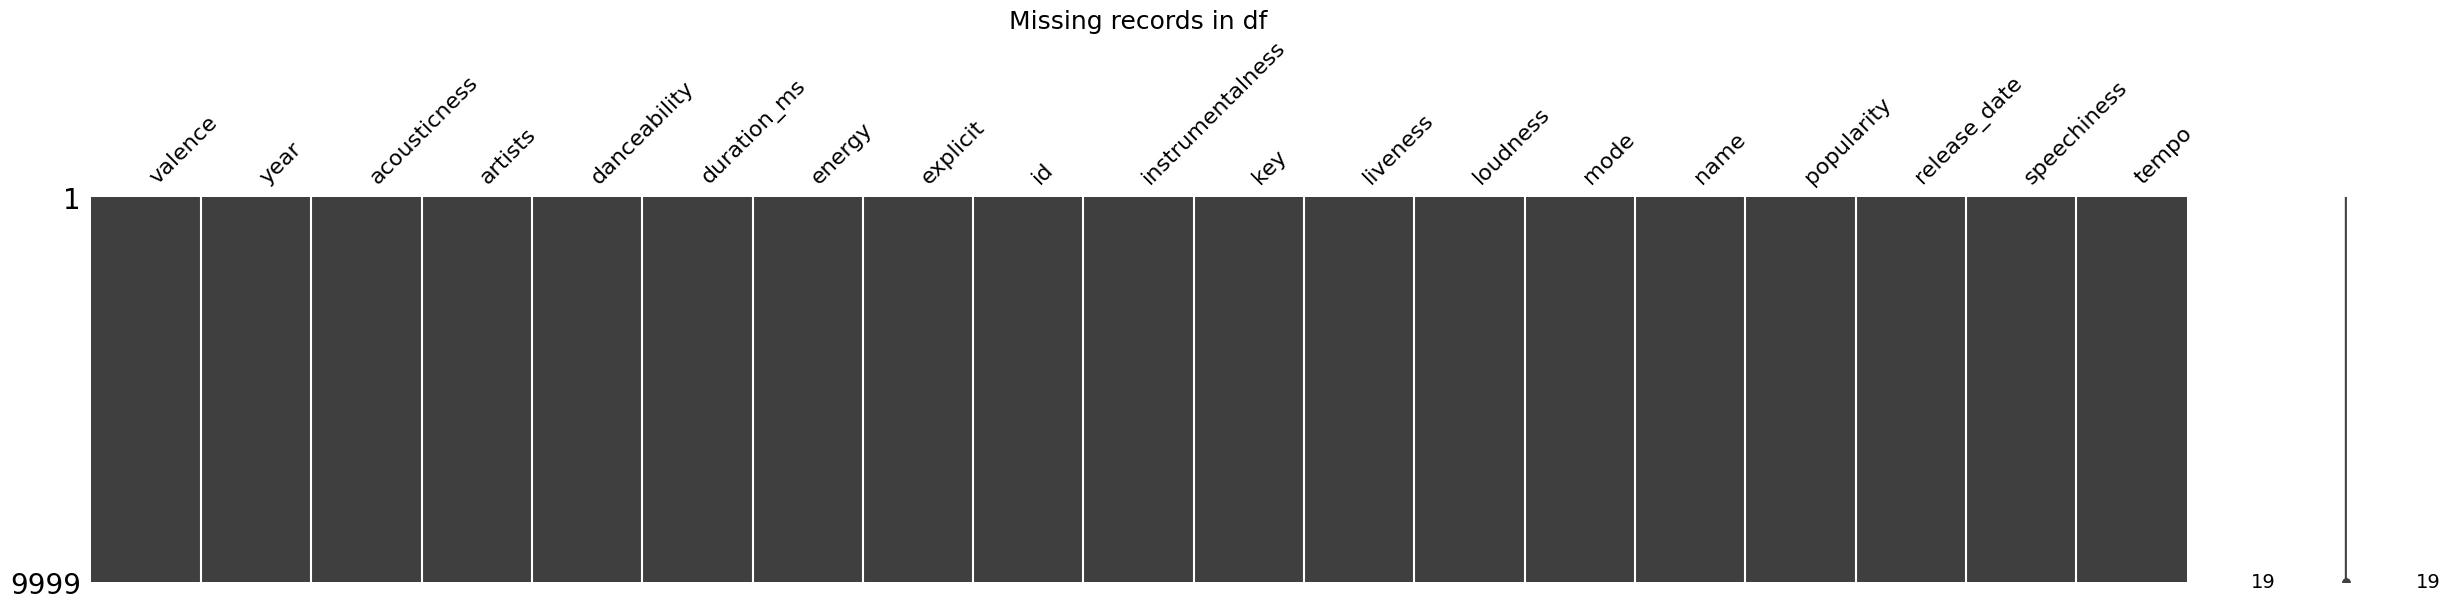

In [99]:
missingno.matrix(df, figsize = (30,5))
plt.title("Missing records in df", fontsize = '18') 

Text(0.5, 1.0, 'Missing records in df_year')

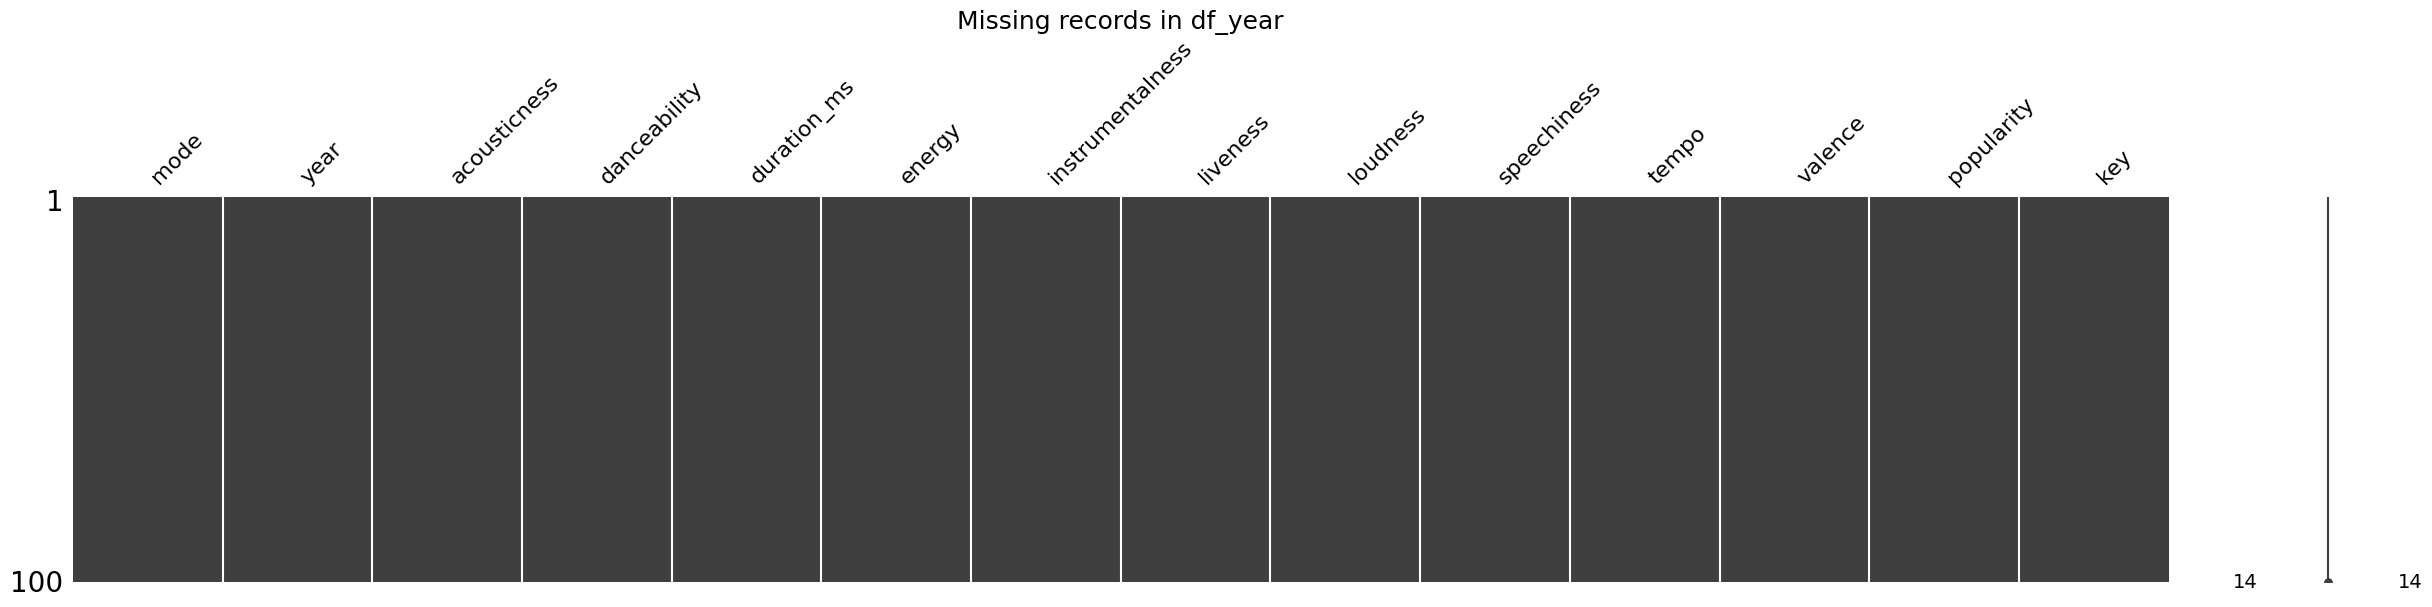

In [100]:
missingno.matrix(df_year, figsize = (30,5))
plt.title("Missing records in df_year", fontsize = '18')

Text(0.5, 1.0, 'Missing records in df_genre')

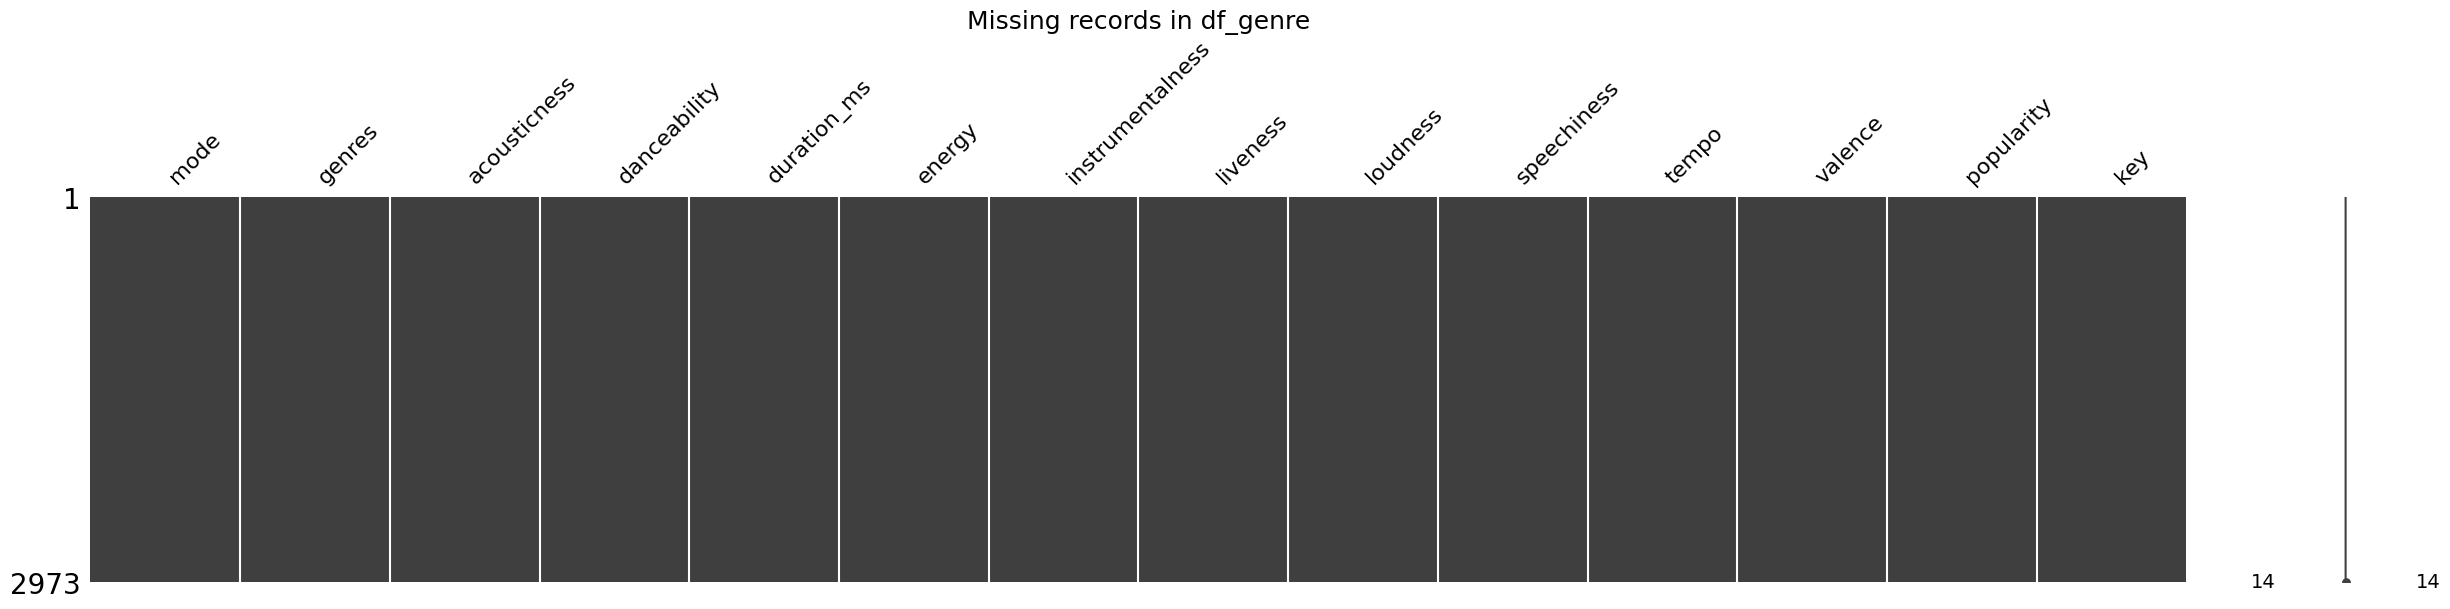

In [101]:
missingno.matrix(df_genre, figsize = (30,5))
plt.title("Missing records in df_genre", fontsize = '18')

#Exploratory Data Analysis

## Basic Analysis

In [102]:
df.head()

valence  year  acousticness  \
0   0.0594  1921         0.982   
1   0.9630  1921         0.732   
2   0.0394  1921         0.961   
3   0.1650  1921         0.967   
4   0.2530  1921         0.957   

                                             artists  danceability  \
0  ['Sergei Rachmaninoff', 'James Levine', 'Berli...         0.279   
1                                     ['Dennis Day']         0.819   
2  ['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...         0.328   
3                                   ['Frank Parker']         0.275   
4                                     ['Phil Regan']         0.418   

   duration_ms  energy  explicit                      id  instrumentalness  \
0       831667   0.211         0  4BJqT0PrAfrxzMOxytFOIz          0.878000   
1       180533   0.341         0  7xPhfUan2yNtyFG0cUWkt8          0.000000   
2       500062   0.166         0  1o6I8BglA6ylDMrIELygv1          0.913000   
3       210000   0.309         0  3ftBPsC5vPBKxYSee08FDH          0.000028   
4       166693   0.193         0  4d6HGyGT8e121BsdKmw9v6          0.000002   

  key  liveness  loudness mode  \
0  10     0.665   -20.096    1   
1   7     0.160   -12.441    1   
2   3     0.101   -14.850    1   
3   5     0.381    -9.316    1   
4   3     0.229   -10.096    1   

                                                name  popularity release_date  \
0  Piano Concerto No. 3 in D Minor, Op. 30: III. ...           4         1921   
1                            Clancy Lowered the Boom           5         1921   
2                                          Gati Bali           5         1921   
3                                          Danny Boy           3         1921   
4                        When Irish Eyes Are Smiling           2         1921   

   speechiness    tempo  
0       0.0366   80.954  
1       0.4150   60.936  
2       0.0339  110.339  
3       0.0354  100.109  
4       0.0380  101.665

year
1921    1
1922    1
1923    1
1924    1
1925    1
       ..
2016    1
2017    1
2018    1
2019    1
2020    1
Name: count, Length: 100, dtype: int64

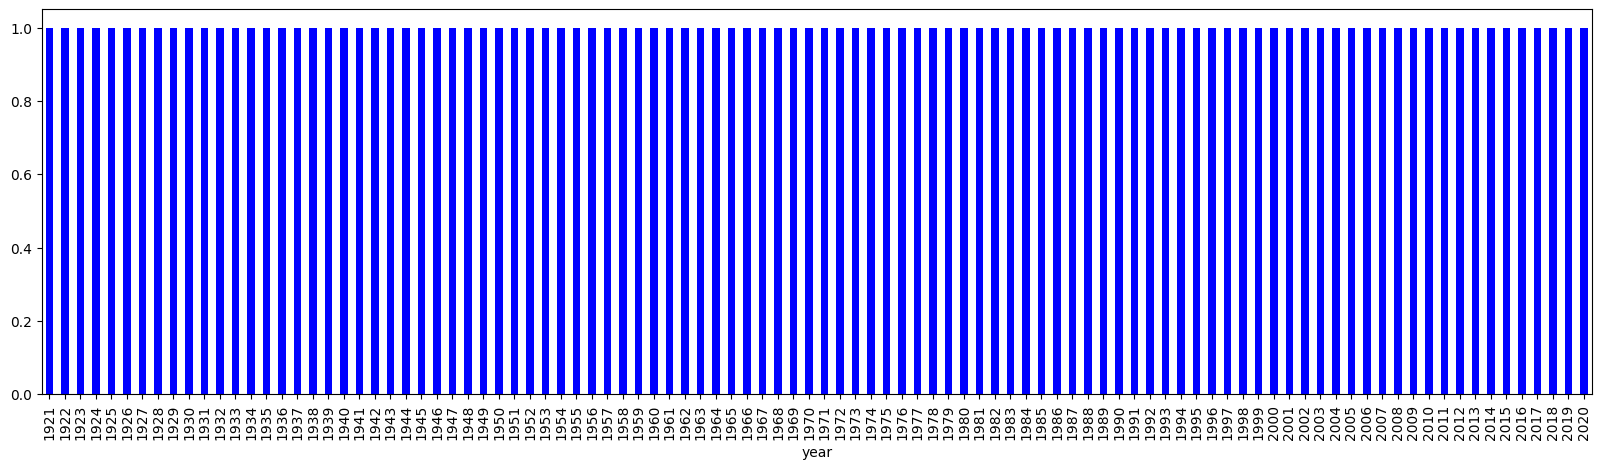

In [103]:

df_year.head()
df_genre.head()
df_year['year'].value_counts().sort_index().plot(kind = 'bar', figsize = (20,5), color = 'blue')
df_year['year'].value_counts().sort_index()

In [104]:
%pip install nbformat>=4.2.0

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Bannu\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [105]:
%pip install nbformat>=4.2.0

# Group by 'year' and count the number of songs
year_count = df_year.groupby('year').size().reset_index(name='count')

# Create a bar plot using Plotly
fig = px.bar(year_count, x='year', y='count', title='Number of Songs by Year',
             labels={'year': 'Year', 'count': 'Number of Songs'},
             color='count', color_continuous_scale=px.colors.sequential.Viridis)


# Show the plot
fig.show()

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Bannu\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [106]:

# Rename columns to ensure uniqueness
year_count.columns = ['year', 'count']

# Create a bar plot using Plotly
fig = px.bar(year_count, x='year', y='count', title='Number of Songs by Year')

# Update layout for better readability
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Number of Songs',
    title_x=0.5,  # Center the title
    title_y=0.95,  # Adjust the vertical position of the title
    width=800,  # Set the width of the figure
    height=400,  # Set the height of the figure
)

# Show the figure with a compatible renderer
fig.show(renderer="notebook")

In [107]:
sound_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence']
fig = px.line(df_year, x='year', y=sound_features, title="MUSIC PROFILE THROUGHOUT THE YEARS",
                 width=1000, height=500)
fig.add_vrect(x0=1966, x1=1966, line_width=1, line_color="red")

fig.show(renderer="colab")

In [108]:
top10_genres = df_genre.nlargest(10, 'popularity')

fig = px.bar(top10_genres, x='genres', y=['valence', 'energy', 'danceability', 'acousticness'], barmode='group', title = 'TOP 10 GENRES AND THEIR MUSIC PROFILE COMPOSITION',
                 width=1000, height=500)
fig.show(renderer="colab")

In [109]:
# Only use numeric columns for correlation
df_corr = round(df.select_dtypes(include=[np.number]).corr(), 2)

# Create a heatmap using Plotly
fig = px.imshow(df_corr, text_auto=True, aspect="auto", color_continuous_scale='RdBu',
                 title='Correlation Heatmap of Numeric Features')

# Show the plot
fig.show()

In [110]:
df_corr = round(df.select_dtypes(include=[np.number]).corr(), 2)
fig = px.imshow(df_corr, text_auto=True, title='CORRELATION HEATMAP (df)')
fig.update_layout(
    autosize=False,
    width=800,
    height=800)
fig.show(renderer="colab")

In [111]:
df.head()

valence  year  acousticness  \
0   0.0594  1921         0.982   
1   0.9630  1921         0.732   
2   0.0394  1921         0.961   
3   0.1650  1921         0.967   
4   0.2530  1921         0.957   

                                             artists  danceability  \
0  ['Sergei Rachmaninoff', 'James Levine', 'Berli...         0.279   
1                                     ['Dennis Day']         0.819   
2  ['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...         0.328   
3                                   ['Frank Parker']         0.275   
4                                     ['Phil Regan']         0.418   

   duration_ms  energy  explicit                      id  instrumentalness  \
0       831667   0.211         0  4BJqT0PrAfrxzMOxytFOIz          0.878000   
1       180533   0.341         0  7xPhfUan2yNtyFG0cUWkt8          0.000000   
2       500062   0.166         0  1o6I8BglA6ylDMrIELygv1          0.913000   
3       210000   0.309         0  3ftBPsC5vPBKxYSee08FDH          0.000028   
4       166693   0.193         0  4d6HGyGT8e121BsdKmw9v6          0.000002   

  key  liveness  loudness mode  \
0  10     0.665   -20.096    1   
1   7     0.160   -12.441    1   
2   3     0.101   -14.850    1   
3   5     0.381    -9.316    1   
4   3     0.229   -10.096    1   

                                                name  popularity release_date  \
0  Piano Concerto No. 3 in D Minor, Op. 30: III. ...           4         1921   
1                            Clancy Lowered the Boom           5         1921   
2                                          Gati Bali           5         1921   
3                                          Danny Boy           3         1921   
4                        When Irish Eyes Are Smiling           2         1921   

   speechiness    tempo  
0       0.0366   80.954  
1       0.4150   60.936  
2       0.0339  110.339  
3       0.0354  100.109  
4       0.0380  101.665

## PCA to Analyze Songs

In [112]:
chosen = ["energy", "liveness", "tempo", "valence", "loudness", "speechiness", "acousticness", "danceability", "instrumentalness"]
text1 = df["artists"] + " - " + df["name"]
text2 = text1.values

X = df[chosen].values
y = df["danceability"].values

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

pca = PCA(n_components=3)
pca.fit(X)

X = pca.transform(X)

In [113]:
trace = go.Scatter3d(
    x=X[:,0],
    y=X[:,1],
    z=X[:,2],
    text=text2,
    mode="markers",
    marker=dict(
        size=8,
        color=y,
        colorbar=dict(
            title="Danceability"
        )
    )
)

fig = go.Figure(data=[trace])

fig.update_layout(
    title='WHICH SONGS ARE DANCEABLE?', 
    autosize=False,
    width=1200, 
    height=900,
    margin=dict(l=65, r=50, b=65, t=90),
    scene=dict(
        xaxis_title="Principal Component 1",
        yaxis_title="Principal Component 2",
        zaxis_title="Principal Component 3",
    ),
)

fig.show(renderer="colab")


# Data Mining

## Clustering Genre and applying T-SNE to get embeddings

In [114]:
df_genre = pd.read_csv('data/data_by_genres.csv')

In [115]:
song_cluster_pipeline = Pipeline([('scaler', StandardScaler()), 
                                  ('kmeans', KMeans(n_clusters=10, 
                                   verbose=False))
                                 ], verbose=False)

X_genre = df_genre.select_dtypes(np.number)
number_cols = list(X_genre.columns)
song_cluster_pipeline.fit(X_genre)
song_cluster_labels = song_cluster_pipeline.predict(X_genre)
df_genre['cluster_label'] = song_cluster_labels

In [116]:
from sklearn.manifold import TSNE

tsne_pipeline = Pipeline([('scaler', StandardScaler()), ('tsne', TSNE(n_components=2, verbose=1))])
genre_embedding = tsne_pipeline.fit_transform(X_genre)
projection1 = pd.DataFrame(columns=['x', 'y'], data=genre_embedding)
projection1['genres'] = df_genre['genres']
projection1['cluster'] = df_genre['cluster_label']


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2973 samples in 0.004s...
[t-SNE] Computed neighbors for 2973 samples in 0.345s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2973
[t-SNE] Computed conditional probabilities for sample 2000 / 2973
[t-SNE] Computed conditional probabilities for sample 2973 / 2973
[t-SNE] Mean sigma: 0.777516
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.105942
[t-SNE] KL divergence after 1000 iterations: 1.395350


In [117]:
projection1.head()

x          y                  genres  cluster
0 -46.639866  -1.509881  21st century classical        5
1 -42.579704 -17.045481                   432hz        0
2   5.442960 -20.316782                   8-bit        2
3 -29.294992  25.661766                      []        1
4 -12.574945  10.128069              a cappella        6

In [118]:
projection1["cluster"] = projection1["cluster"].astype(str)
fig = px.scatter(
    projection1, x='x', y='y', color='cluster', hover_data=['x', 'y', 'genres'],width=1200,
    height=800)

fig.update_layout(
    title='T-SNE over Genre Data - 2 Dimensions', 
    autosize=False,
    width=1200, 
    height=800,
    margin=dict(l=65, r=50, b=65, t=90),
    scene=dict(
        xaxis_title="t-sne 1",
        yaxis_title="t-sne 2"
    )
)
fig.show()

In [119]:
from sklearn.manifold import TSNE

tsne_pipeline = Pipeline([('scaler', StandardScaler()), ('tsne', TSNE(n_components=3, verbose=1))])
genre_embedding = tsne_pipeline.fit_transform(X_genre)
projection2 = pd.DataFrame(columns=['x', 'y','z'], data=genre_embedding)
projection2['genres'] = df_genre['genres']
projection2['cluster'] = df_genre['cluster_label']

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2973 samples in 0.007s...
[t-SNE] Computed neighbors for 2973 samples in 0.374s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2973
[t-SNE] Computed conditional probabilities for sample 2000 / 2973
[t-SNE] Computed conditional probabilities for sample 2973 / 2973
[t-SNE] Mean sigma: 0.777516
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.239906
[t-SNE] KL divergence after 1000 iterations: 1.194796


In [120]:
projection2.head()

x         y         z                  genres  cluster
0 -16.335854 -4.981670 -1.108089  21st century classical        5
1 -10.075526 -8.442115  5.161378                   432hz        0
2   2.590704 -4.790228 -3.066503                   8-bit        2
3  -8.965306  5.215100 -5.381055                      []        1
4  -4.512449  0.898954 -9.540373              a cappella        6

In [121]:
projection2["cluster"] = projection2["cluster"].astype(str)
fig = px.scatter_3d(projection2, x='x', y='y', z='z',
              color='cluster', hover_data=["genres"])

fig.update_layout(
    title='T-SNE over Genre Data - 3 Dimensions', 
    autosize=False,
    width=1200, 
    height=800,
    margin=dict(l=65, r=50, b=65, t=90),
    scene=dict(
        xaxis_title="t-sne 1",
        yaxis_title="t-sne 2",
        zaxis_title="t-sne 3",
    )
)
fig.show()

## Clustering Songs and applying PCA to get embeddings

In [122]:
song_cluster_pipeline = Pipeline([('scaler', StandardScaler()), 
                                  ('kmeans', KMeans(n_clusters=20, 
                                   verbose=False))
                                 ], verbose=False)

X = df.select_dtypes(np.number)
number_cols = list(X.columns)
song_cluster_pipeline.fit(X)
song_cluster_labels = song_cluster_pipeline.predict(X)
df['cluster_label'] = song_cluster_labels

In [123]:
df

valence  year  acousticness  \
0      0.0594  1921      0.982000   
1      0.9630  1921      0.732000   
2      0.0394  1921      0.961000   
3      0.1650  1921      0.967000   
4      0.2530  1921      0.957000   
...       ...   ...           ...   
9994   0.8640  1971      0.729000   
9995   0.8580  1971      0.686000   
9996   0.4740  1971      0.000394   
9997   0.4970  1971      0.843000   
9998   0.2090  1971      0.284000   

                                                artists  danceability  \
0     ['Sergei Rachmaninoff', 'James Levine', 'Berli...         0.279   
1                                        ['Dennis Day']         0.819   
2     ['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...         0.328   
3                                      ['Frank Parker']         0.275   
4                                        ['Phil Regan']         0.418   
...                                                 ...           ...   
9994                                     ['John Prine']         0.501   
9995                                    ['Tom T. Hall']         0.628   
9996                                  ['Black Sabbath']         0.386   
9997                                    ['Carole King']         0.661   
9998       ['Paul Revere & The Raiders', 'The Raiders']         0.639   

      duration_ms  energy  explicit                      id  instrumentalness  \
0          831667   0.211         0  4BJqT0PrAfrxzMOxytFOIz          0.878000   
1          180533   0.341         0  7xPhfUan2yNtyFG0cUWkt8          0.000000   
2          500062   0.166         0  1o6I8BglA6ylDMrIELygv1          0.913000   
3          210000   0.309         0  3ftBPsC5vPBKxYSee08FDH          0.000028   
4          166693   0.193         0  4d6HGyGT8e121BsdKmw9v6          0.000002   
...           ...     ...       ...                     ...               ...   
9994       172600   0.285         0  5xIVA72uBH9dsTNC7L37LV          0.000000   
9995       164720   0.433         0  1sfXFEpGVK5s5i8eHEtNPj          0.000005   
9996       326001   0.679         0  3muMI7YXx7JU3yaaJzWVPw          0.001230   
9997       186907   0.341         0  4EGyc152dlYpuQZ47cRC8j          0.000013   
9998       171933   0.385         0  3mDOHVY9MWZOTODSNF5GBj          0.001930   

     key  liveness  loudness mode  \
0     10    0.6650   -20.096    1   
1      7    0.1600   -12.441    1   
2      3    0.1010   -14.850    1   
3      5    0.3810    -9.316    1   
4      3    0.2290   -10.096    1   
...   ..       ...       ...  ...   
9994   7    0.1020   -15.378    1   
9995   1    0.0932   -10.876    1   
9996   7    0.1240   -13.233    1   
9997   8    0.1090   -11.175    1   
9998   2    0.0873   -13.253    1   

                                                   name  popularity  \
0     Piano Concerto No. 3 in D Minor, Op. 30: III. ...           4   
1                               Clancy Lowered the Boom           5   
2                                             Gati Bali           5   
3                                             Danny Boy           3   
4                           When Irish Eyes Are Smiling           2   
...                                                 ...         ...   
9994  Your Flag Decal Won't Get You into Heaven Anymore          47   
9995                 The Year That Clayton Delaney Died          50   
9996                      After Forever - 2014 Remaster          45   
9997                                          Beautiful          50   
9998  Indian Reservation (The Lament of the Cherokee...          47   

     release_date  speechiness    tempo  cluster_label  
0            1921       0.0366   80.954             15  
1            1921       0.4150   60.936             16  
2            1921       0.0339  110.339             15  
3            1921       0.0354  100.109             12  
4            1921       0.0380  101.665              5  
...           ...          ...      ...            ...  
9994         1

In [124]:
'''from sklearn import metrics
k = metrics.silhouette_score(df.select_dtypes(np.number), df['cluster_label'], metric='euclidean')
print("Silhouette Co-efficient: " + str(round(k,2)))
dunn = metrics.davies_bouldin_score(df.select_dtypes(np.number), df['cluster_label'])
print("Davis Bouldin Score: " + str(round(k,2)))'''

'from sklearn import metrics\nk = metrics.silhouette_score(df.select_dtypes(np.number), df[\'cluster_label\'], metric=\'euclidean\')\nprint("Silhouette Co-efficient: " + str(round(k,2)))\ndunn = metrics.davies_bouldin_score(df.select_dtypes(np.number), df[\'cluster_label\'])\nprint("Davis Bouldin Score: " + str(round(k,2)))'

In [125]:
'''# Silhouette Score for K means
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(18,22), metric='silhouette', timings= True, size=(1000, 500))
visualizer.fit(X.iloc[:50000, :-1])      
visualizer.show()'''

"# Silhouette Score for K means\nfrom yellowbrick.cluster import KElbowVisualizer\nmodel = KMeans()\nvisualizer = KElbowVisualizer(model, k=(18,22), metric='silhouette', timings= True, size=(1000, 500))\nvisualizer.fit(X.iloc[:50000, :-1])      \nvisualizer.show()"

In [126]:
'''from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(10,22), metric='calinski_harabasz', timings= True, size=(1000, 500),locate_elbow=False)
visualizer.fit(X.iloc[:50000, :-1])      
visualizer.show()'''

"from yellowbrick.cluster import KElbowVisualizer\nmodel = KMeans()\nvisualizer = KElbowVisualizer(model, k=(10,22), metric='calinski_harabasz', timings= True, size=(1000, 500),locate_elbow=False)\nvisualizer.fit(X.iloc[:50000, :-1])      \nvisualizer.show()"

In [127]:
# Visualizing the Clusters with PCA

from sklearn.decomposition import PCA

pca_pipeline = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=2))])
song_embedding = pca_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=['x', 'y'], data=song_embedding)
projection['title'] = df['name']
projection['cluster'] = df['cluster_label']


In [128]:
projection["cluster"] = projection["cluster"].astype(str)
fig = px.scatter(
    projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'title'])

fig.update_layout(
    title='PCA over Song Data - 2 Dimensions', 
    autosize=False,
    width=1200, 
    height=800,
    margin=dict(l=65, r=50, b=65, t=90),
    scene=dict(
        xaxis_title="Principal Component 1",
        yaxis_title="Principal Component 2",
    )
)
fig.show()

In [129]:
projection

x         y                                              title  \
0    -3.530124 -0.764087  Piano Concerto No. 3 in D Minor, Op. 30: III. ...   
1     1.125360  2.039407                            Clancy Lowered the Boom   
2    -2.846427 -0.828795                                          Gati Bali   
3    -1.021040 -0.770410                                          Danny Boy   
4    -0.980396 -0.330235                        When Irish Eyes Are Smiling   
...        ...       ...                                                ...   
9994  1.057934 -0.538071  Your Flag Decal Won't Get You into Heaven Anymore   
9995  1.927290 -0.597635                 The Year That Clayton Delaney Died   
9996  1.823228 -1.236922                      After Forever - 2014 Remaster   
9997  0.556315 -0.645820                                          Beautiful   
9998  1.139586 -0.513468  Indian Reservation (The Lament of the Cherokee...   

     cluster  
0         15  
1         16  
2         15  
3         12  
4          5  
...      ...  
9994      19  
9995      19  
9996      14  
9997      19  
9998      14  

[9999 rows x 4 columns]

#Recommendation System

In [130]:
#!pip install spotipy
%env SPOTIFY_CLIENT_ID=b4a54486fe1f4bfa84180d00a67afd61
%env SPOTIFY_CLIENT_SECRET=9435f0be3b2848898e27f061cc496266

env: SPOTIFY_CLIENT_ID=b4a54486fe1f4bfa84180d00a67afd61
env: SPOTIFY_CLIENT_SECRET=9435f0be3b2848898e27f061cc496266


In [131]:
import spotipy as sp
from spotipy.oauth2 import SpotifyClientCredentials
from collections import defaultdict

#For authentication purpose
#sp_call = sp.Spotify(auth_manager=SpotifyClientCredentials(client_id=os.environ["SPOTIFY_CLIENT_ID"], client_secret=os.environ["SPOTIFY_CLIENT_SECRET"]))
sp_call = sp.Spotify(auth_manager=SpotifyClientCredentials(client_id="b4a54486fe1f4bfa84180d00a67afd61", client_secret="9435f0be3b2848898e27f061cc496266"))


In [132]:
def find_song(name, year):
    song_data = defaultdict()
    results = sp_call.search(q= 'track: {} year: {}'.format(name,year), limit=1)
    if results['tracks']['items'] == []:
        return None

    results = results['tracks']['items'][0]
    track_id = results['id']
    audio_features = sp_call.audio_features(track_id)[0]

    song_data['name'] = [name]
    song_data['year'] = [year]
    song_data['explicit'] = [int(results['explicit'])]
    song_data['duration_ms'] = [results['duration_ms']]
    song_data['popularity'] = [results['popularity']]

    for key, value in audio_features.items():
        song_data[key] = value

    return pd.DataFrame(song_data)

In [133]:
from collections import defaultdict
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist
import difflib

'''number_cols = ['valence', 'year', 'acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity', 'speechiness', 'tempo']'''

number_cols = ['valence',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'explicit',
 'instrumentalness',
 'liveness',
 'loudness',
 'popularity',
 'speechiness',
 'tempo']

def get_song_data(song, spotify_data):
    
    try:
        song_data = spotify_data[(spotify_data['name'] == song['name']) 
                                & (spotify_data['year'] == song['year'])].iloc[0]
        return song_data
    
    except IndexError:
        return find_song(song['name'], song['year'])
        

def get_mean_vector(song_list, spotify_data):
    
    song_vectors = []
    
    for song in song_list:
        song_data = get_song_data(song, spotify_data)
        if song_data is None:
            print('Warning: {} does not exist in Spotify or in database'.format(song['name']))
            continue
        song_vector = song_data[number_cols].values
        song_vectors.append(song_vector)  
    
    song_matrix = np.array(list(song_vectors))
    return np.mean(song_matrix, axis=0)
    


def unnest_dictionary(song_list_dict):
    
    flattened_dict = defaultdict()
    for key in song_list_dict[0].keys():
        flattened_dict[key] = []
    
    for dictionary in song_list_dict:
        for key, value in dictionary.items():
            flattened_dict[key].append(value)
            
    return flattened_dict


def recommend_songs( song_list, spotify_data, n_songs=10):
    
    metadata_cols = ['name', 'year', 'artists']
    song_dict = unnest_dictionary(song_list)
    
    #Get mean vector of input song list
    song_center = get_mean_vector(song_list, spotify_data)

    #get scaler step from pipeline
    scaler = song_cluster_pipeline[0]

    #scale dataset vector
    scaled_data = scaler.transform(spotify_data[number_cols])

    #scale input vector
    scaled_song_center = scaler.transform(song_center.reshape(1, -1))

    #calculate cosine similarity
    distances = cdist(scaled_song_center, scaled_data, 'cosine')

    #sort by similarity and select top n vectors
    index = list(np.argsort(distances)[:, :n_songs][0])
    
    #fetch recommended songs based on index
    recommended_songs = spotify_data.iloc[index]
    recommended_songs = recommended_songs[~recommended_songs['name'].isin(song_dict['name'])]
    return recommended_songs[metadata_cols].to_dict(orient='records')

In [134]:
#print the recommended songs

song_list = [{'name': 'Shape of You', 'year': 2017}, {'name': 'Blinding Lights', 'year': 2020}]
recommended_songs = recommend_songs(song_list, df, n_songs=10)
for song in recommended_songs:
    print('Song: {}, Year: {}'.format(song['name'], song['year']))
    # print('Recommended because: {}'.format(song['reason']))  # 'reason' key does not exist
    print('---')
# Get the song data for the recommended songs
recommended_songs_data = []
for song in recommended_songs:
    song_data = get_song_data(song, df)
    if song_data is not None:
        recommended_songs_data.append(song_data)
    else:
        print('Warning: {} does not exist in Spotify or in database'.format(song['name']))
# Create a DataFrame from the recommended songs data
recommended_songs_df = pd.DataFrame(recommended_songs_data)
# Display the DataFrame
recommended_songs_df


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=3anece0rb6kpS9xOXBmgqq with Params: {} returned 403 due to None


SpotifyException: http status: 403, code: -1 - https://api.spotify.com/v1/audio-features/?ids=3anece0rb6kpS9xOXBmgqq:
 None, reason: None

In [ ]:
df[(df['year'] == 2020) & (df['popularity'] >= 95)]

valence  year  acousticness                                 artists  \
19606   0.7560  2020       0.22100               ['24kGoldn', 'iann dior']   
19607   0.3470  2020       0.11400     ['Pop Smoke', 'Lil Baby', 'DaBaby']   
19608   0.3570  2020       0.01940      ['Cardi B', 'Megan Thee Stallion']   
19610   0.6820  2020       0.46800                       ['Ariana Grande']   
19611   0.1450  2020       0.40100            ['Bad Bunny', 'Jhay Cortez']   
19612   0.5430  2020       0.65000                           ['Pop Smoke']   
19615   0.3720  2020       0.19600  ['Justin Bieber', 'Chance the Rapper']   
19616   0.3340  2020       0.00146                          ['The Weeknd']   
19618   0.7370  2020       0.01120                                 ['BTS']   
19620   0.0927  2020       0.86400       ['Justin Bieber', 'benny blanco']   
19623   0.0799  2020       0.78600                          ['Tate McRae']   

       danceability  duration_ms  energy  explicit                      id  \
19606         0.700       140526   0.722         1  3tjFYV6RSFtuktYl3ZtYcq   
19607         0.823       190476   0.586         1  0PvFJmanyNQMseIFrU708S   
19608         0.935       187541   0.454         1  4Oun2ylbjFKMPTiaSbbCih   
19610         0.737       172325   0.802         1  35mvY5S1H3J2QZyna3TFe0   
19611         0.731       205090   0.573         1  47EiUVwUp4C9fGccaPuUCS   
19612         0.709       160000   0.548         1  1tkg4EHVoqnhR6iFEXb60y   
19615         0.673       212093   0.704         0  5u1n1kITHCxxp8twBcZxWy   
19616         0.514       200040   0.730         0  0VjIjW4GlUZAMYd2vXMi3b   
19618         0.746       199054   0.765         0  0t1kP63rueHleOhQkYSXFY   
19620         0.631       149297   0.239         1  4y4spB9m0Q6026KfkAvy9Q   
19623         0.642       169266   0.374         0  45bE4HXI0AwGZXfZtMp8JR   

       instrumentalness key  liveness  loudness mode  \
19606          0.000000   7    0.2720    -3.558    0   
19607          0.000000   6    0.1930    -6.606    0   
19608          0.000000   1    0.0824    -7.509    1   
19610          0.000000   0    0.0931    -4.771    1   
19611          0.000052   4    0.1130   -10.059    0   
19612          0.000002  10    0.1330    -8.493    1   
19615          0.000000   6    0.0898    -8.056    1   
19616          0.000095   1    0.0897    -5.934    1   
19618          0.000000   6    0.0936    -4.410    0   
19620          0.000000  11    0.1160    -7.071    0   
19623          0.000000   4    0.0906    -9.386    1   

                                          name  popularity release_date  \
19606                   Mood (feat. iann dior)          99   2020-07-24   
19607  For The Night (feat. Lil Baby & DaBaby)          95   2020-07-03   
19608          WAP (feat. Megan Thee Stallion)          96   2020-08-07   
19610                                positions          96   2020-10-30   
19611                                   Dakiti         100   2020-10-30   
19612                  What You Know Bout Love          96   2020-07-03   
19615           Holy (feat. Chance The Rapper)          95   2020-09-18   
19616                          Blinding Lights          96   2020-03-20   
19618                                 Dynamite          97   2020-08-28   
19620               Lonely (with benny blanco)          95   2020-10-16   
19623                       you broke me first          95   2020-04-17   

       speechiness    tempo  cluster_label  
19606       0.0369   90.989             12  
19607       0.2000  125.971             12  
19608       0.3750  133.073             12  
19610       0.0878  144.015              3  
19611       0.0544  109.928             12  
19612       0.3530   83.995             12  
19615       0.3600   86.919              8  
19616       0.0598  171.005              5  
19618       0.0993  114.044              7  
19620       0.0398   79.859             12  
19623       0.0545  124.099              9

#END